In [2]:
# %matplotlib notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

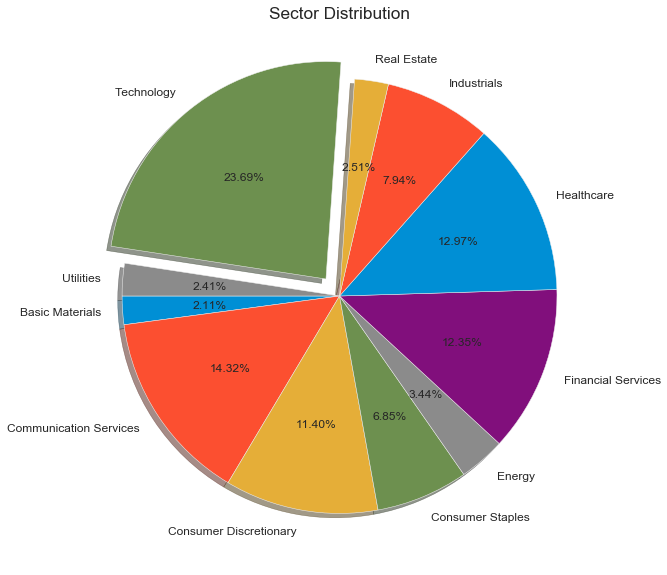

In [9]:
# Getting the data
sector_distribution = companies_df.groupby("Sector")["Marketcap"].sum()
sector_distribution

# Creat the chart
plt.rc('font', size=12)  
explode = (0,0,0,0,0,0,0,0,0,0.1,0)
plt.figure(figsize=(20, 12.36))
sector_distribution.plot(kind = "pie",explode=explode, shadow=True,startangle=180,autopct="%1.2f%%",figsize=(10,10))
plt.axis("off")

# Set appearance
plt.title("Sector Distribution")

plt.savefig("Sector Distribution.png")



plt.show()


In [10]:

# Stock_Market_Selloff - 2015,8,18 - 2015,11,3
# Bitcoin_Crash - 2018,9,20 - 2019,4,23
# Covid_19  - 2020,2,20 - 2020,8,18
# Russian_Invasion_of_Ukraine - 2022,2,10 - 2022,3,30

Period = "Russian_Invasion_of_Ukraine"
this_year_start = datetime(2022,2,10).date()
this_year_end = datetime(2022,3,30).date()

# The tech stocks we'll use for this analysis
# SP_ID = ['^GSPC']
# SP_name = ["S&P500"]
sector_list = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["Financials","Consumer Discretionary","Consumer Staples","Health","Industrials","Information Tech","Materials","Real Estate","Tele Services","Utilities","Energy"]
# Set up End and Start times for data grab
# sector_list = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
thisyear = ['^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
# SP_ID = ['^GSPC']#     thisyear[sector_list.index(stock)] = globals()[stock] = yf.download(stock, this_year_start, this_year_end)
# SP_name = ["S&P500"]
for stock in sector_list: 
#     thisyear[sector_list.index(stock)] = globals()[stock] = yf.download(stock, this_year_start, this_year_end)
    thisyear[sector_list.index(stock)] = yf.download(stock, this_year_start, this_year_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


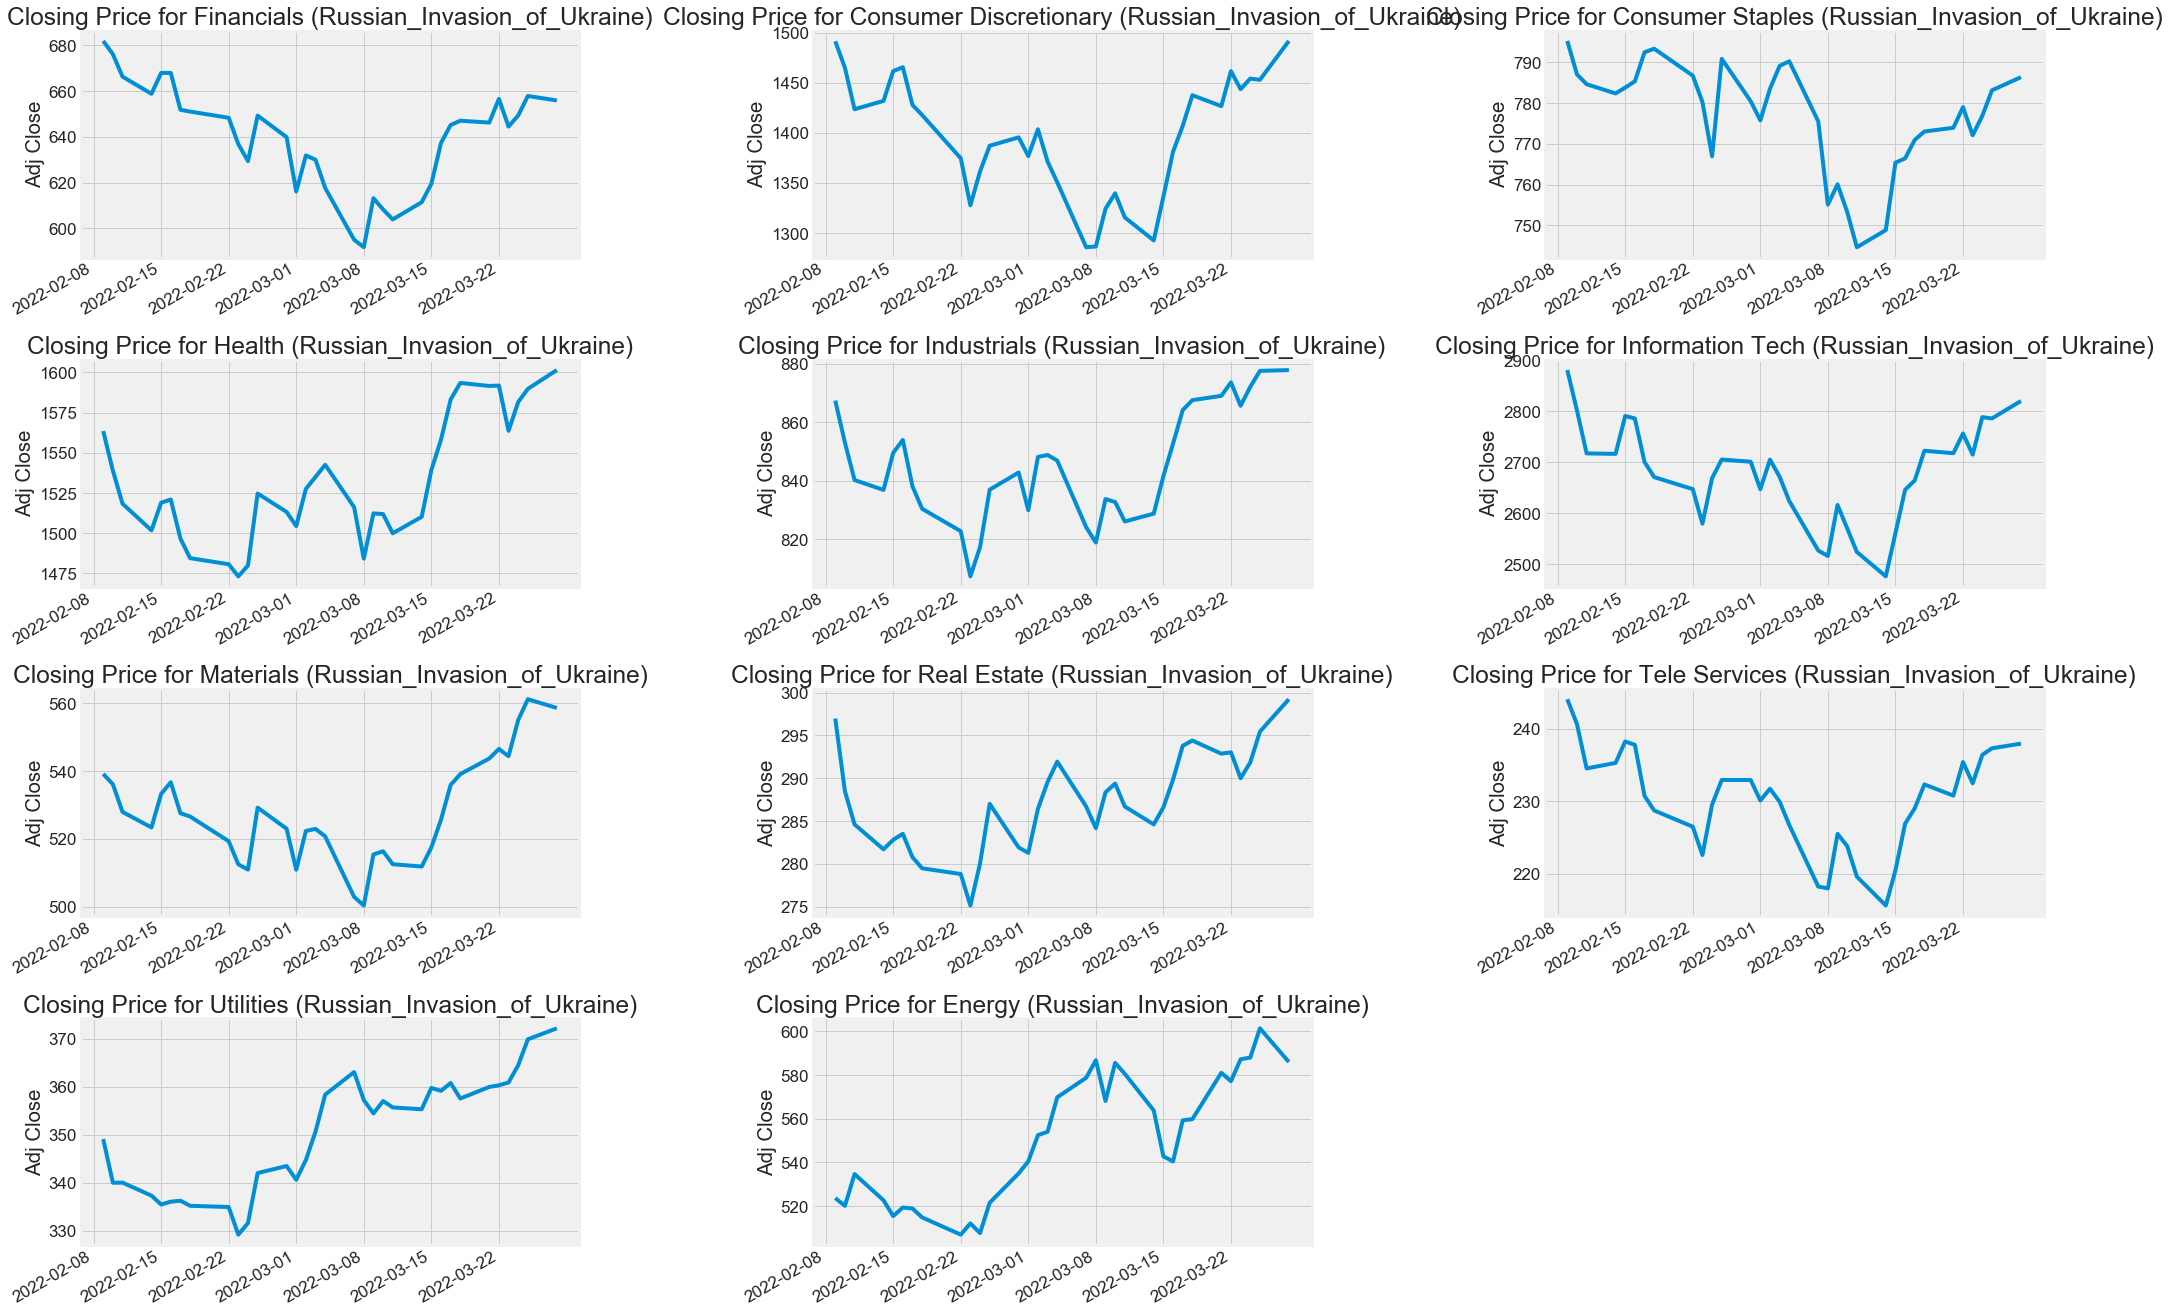

In [11]:
plt.figure(figsize=(30, 18.54))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.rc('font', size=17)  

for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    thisyear[i-1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price for {sector_name[i - 1]} ({Period})")
plt.tight_layout()
plt.savefig(f"Adj Close Change by Sectors ({Period}).png")


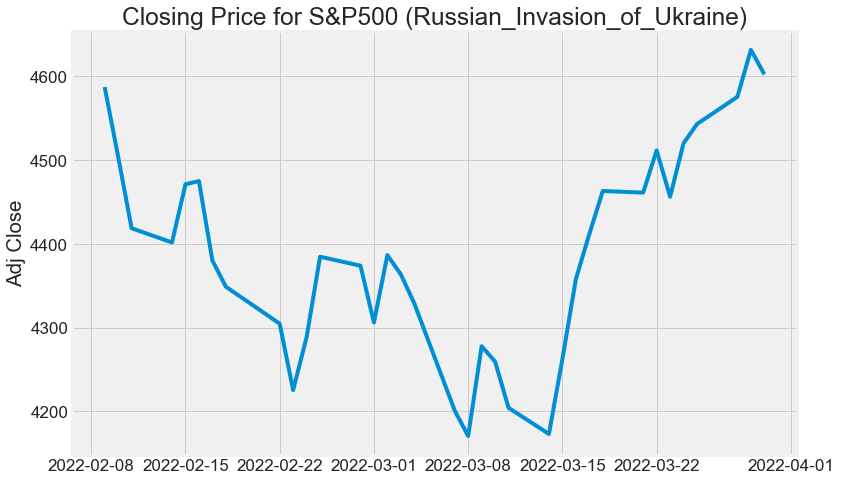

In [12]:
SP500_df = pd.DataFrame(DataReader('^GSPC', 'yahoo', this_year_start, this_year_end)['Adj Close'])
plt.figure(figsize=(12, 7))
plt.plot(SP500_df.index,SP500_df['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price for S&P500 ({Period})")
plt.tight_layout()
plt.savefig(f"Adj Close Change for S&P500 ({Period}).png")

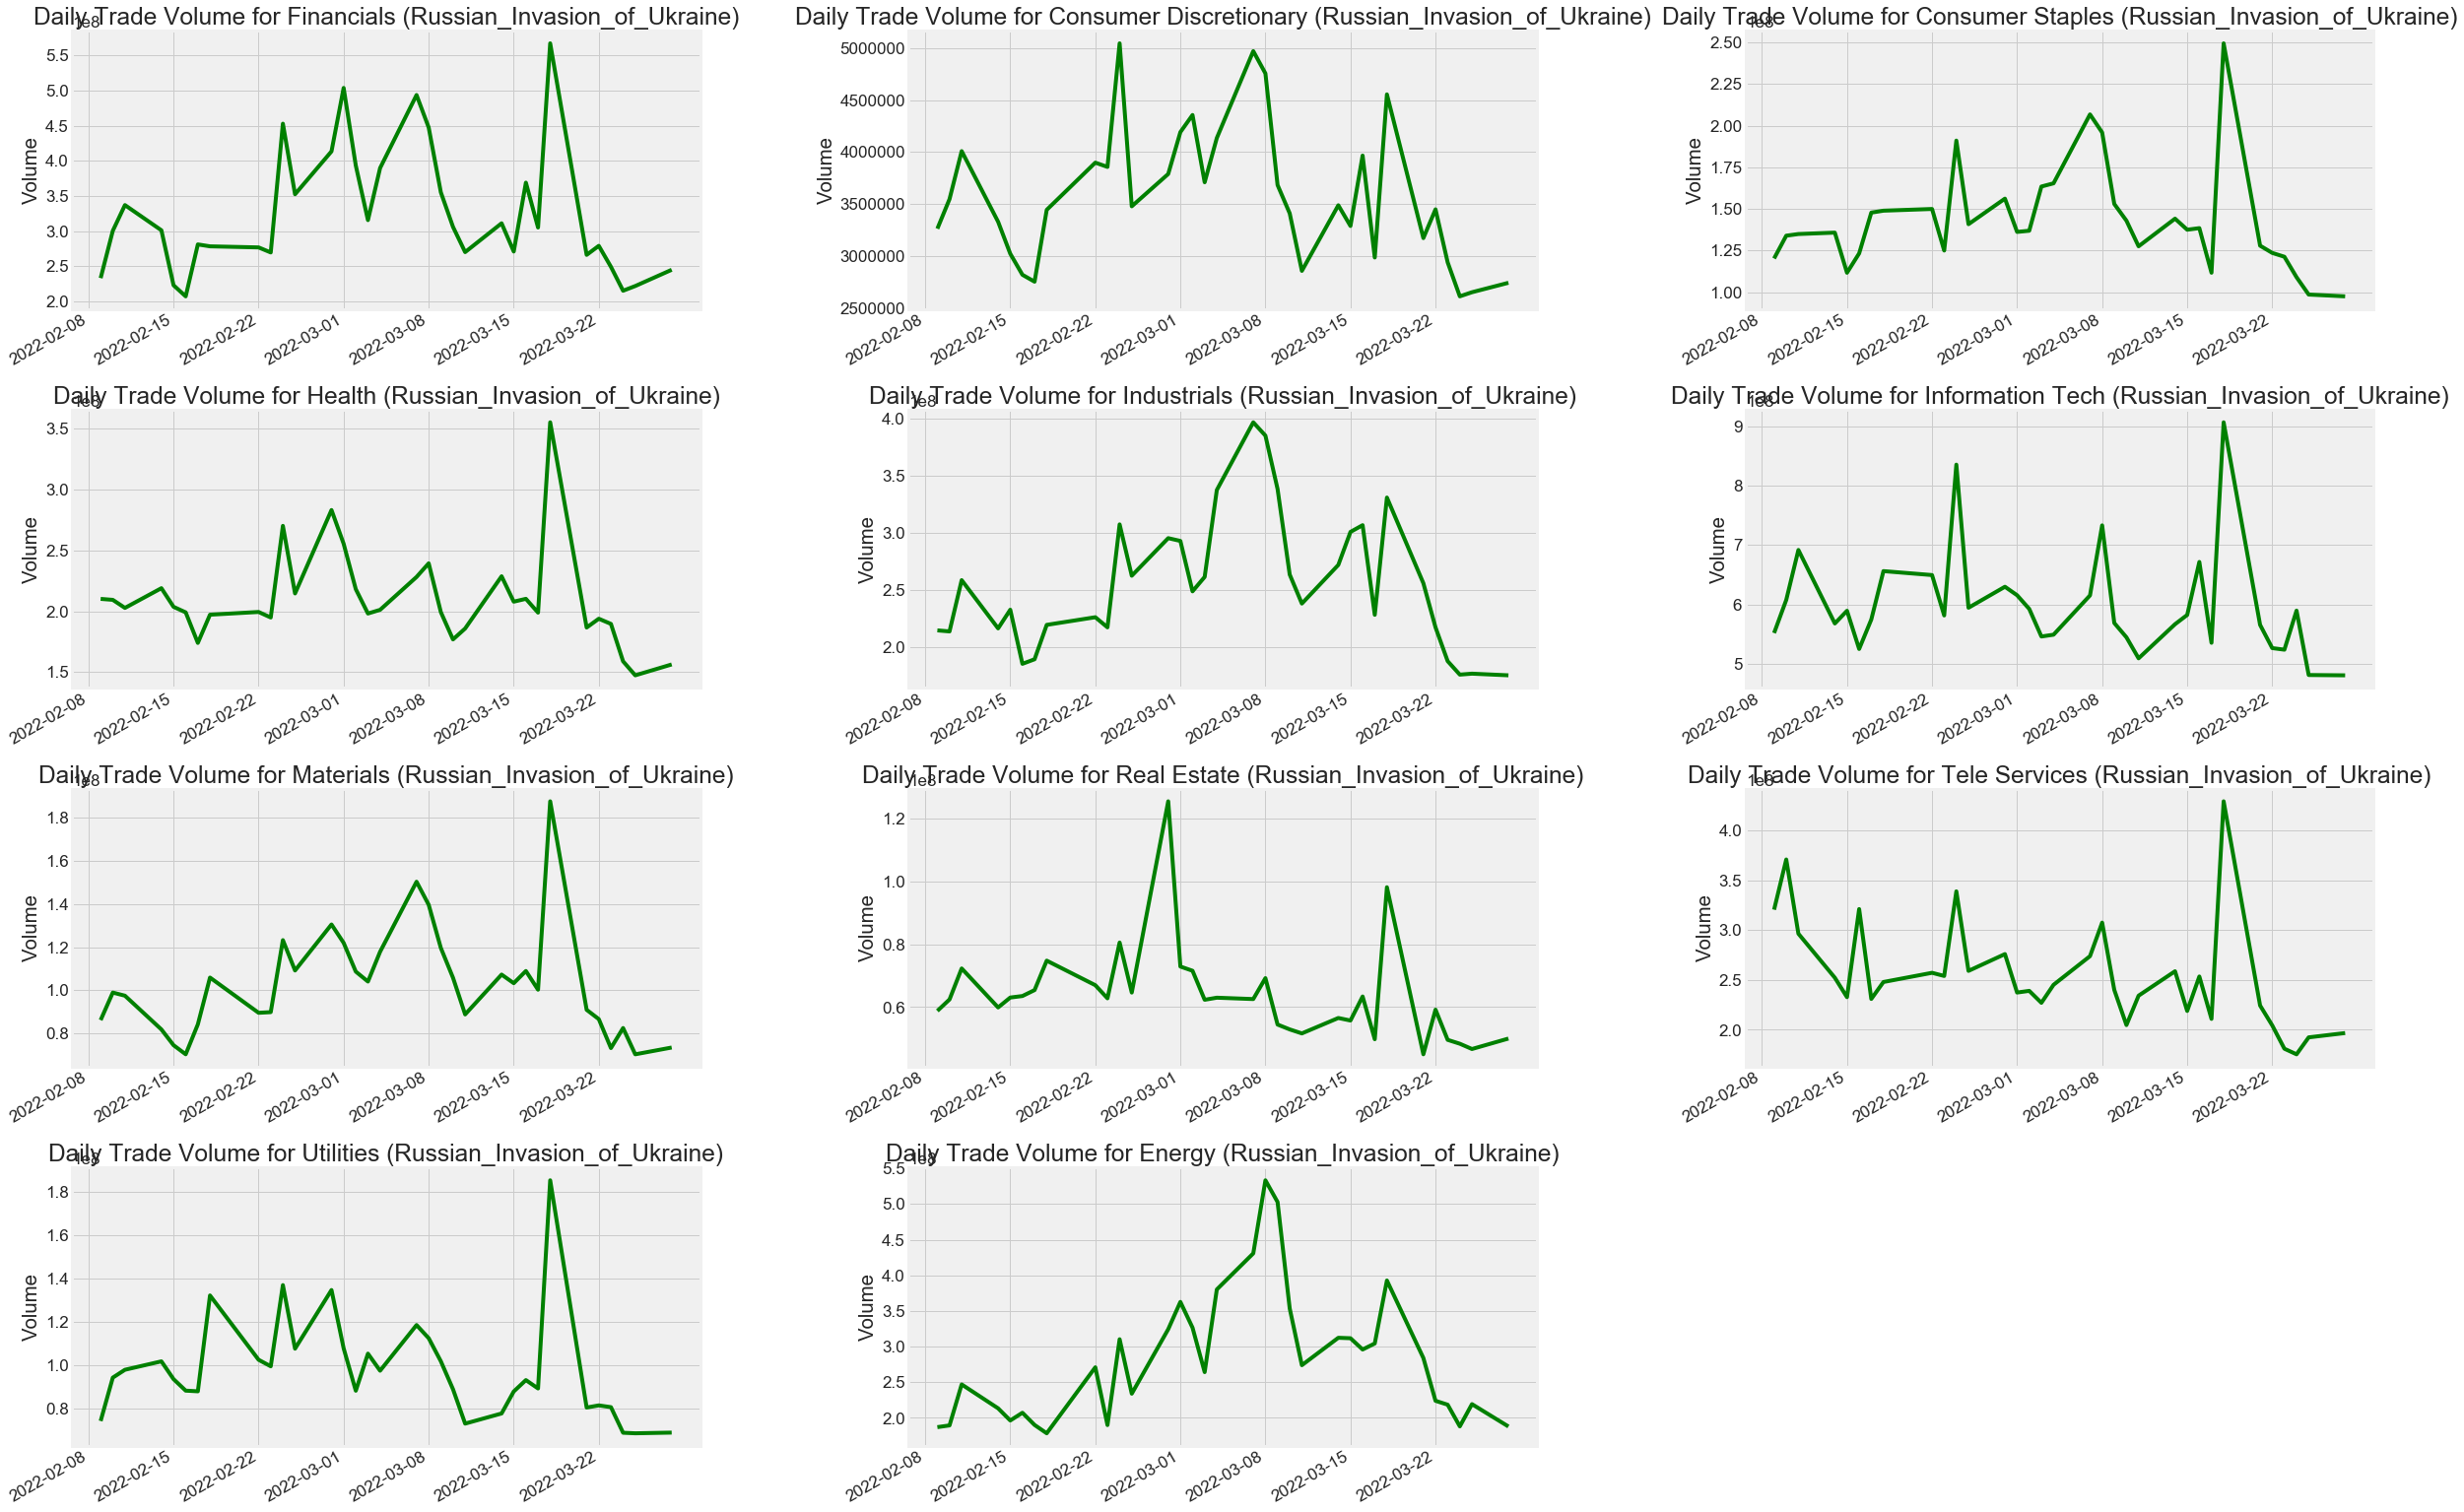

In [13]:
plt.figure(figsize=(35, 21.63))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.rc('font', size=17)  


for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    thisyear[i-1]['Volume'].plot(color="g")

    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Daily Trade Volume for {sector_name[i - 1]} ({Period})")
plt.tight_layout()
plt.savefig(f"Daily Trade Volume by Sectors ({Period}).png")

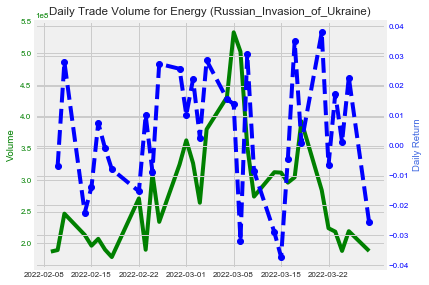

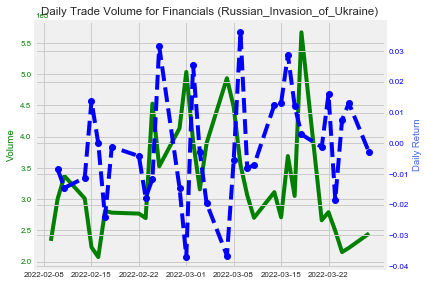

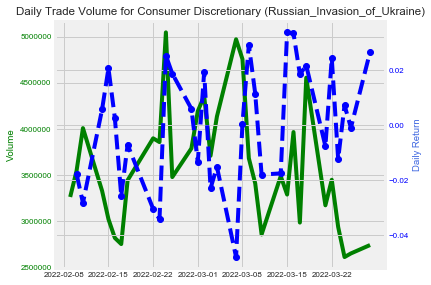

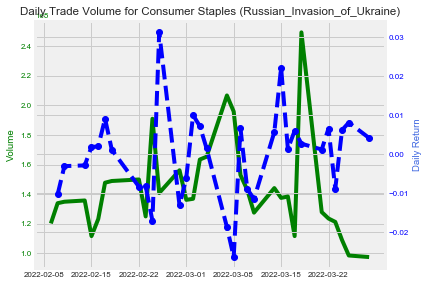

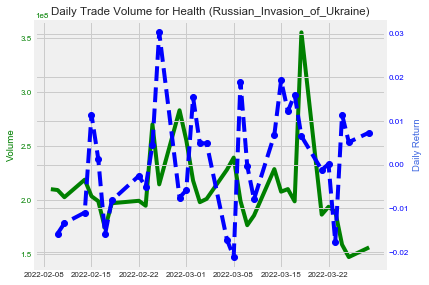

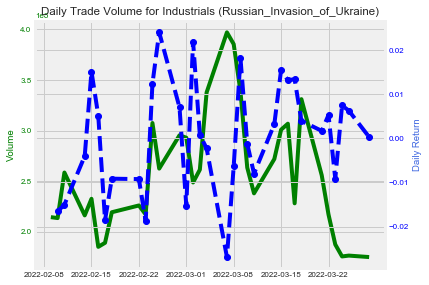

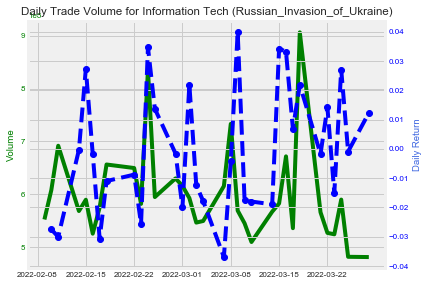

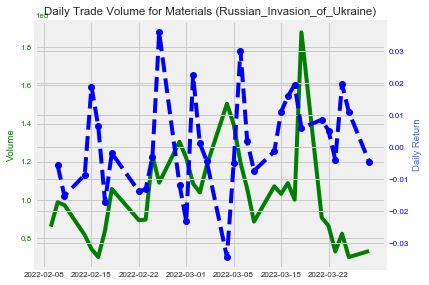

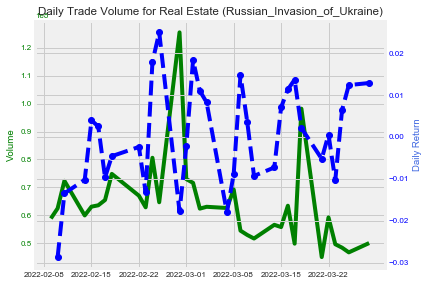

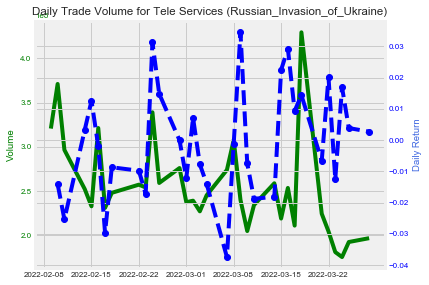

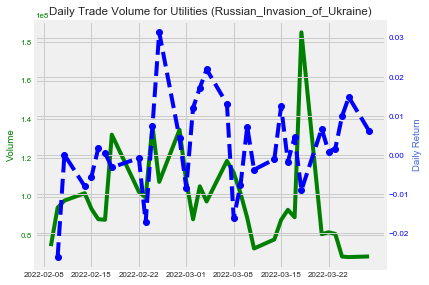

In [14]:
for i in range(11):
    data_1 = thisyear[i-1]['Volume']
    data_2 = thisyear[i-1]['Adj Close'].pct_change()

# Create Plot
    plt.rc('font', size=8)  
    fig, ax1 = plt.subplots() 
    ax1.set_ylabel('Volume', color = 'g')
    ax1.plot(data_1.index, data_1, color = 'g') 
    ax1.tick_params(axis ='y', labelcolor = 'g') 
  
    # Adding Twin Axes

    ax2 = ax1.twinx()
  
    ax2.set_ylabel('Daily Return', color = 'royalblue') 
    ax2.plot(data_2.index, data_2, color = 'b', linestyle='--', marker='o') 
    ax2.tick_params(axis ='y', labelcolor = 'b') 
#     plt.xticks(rotation=15)
    plt.title(f"Daily Trade Volume for {sector_name[i-1]} ({Period})")
#     plt.figure(figsize=(10, 6))
    plt.tight_layout()

    plt.savefig(f"Daily Trade Volume for {sector_name[i-1]} ({Period}).png")



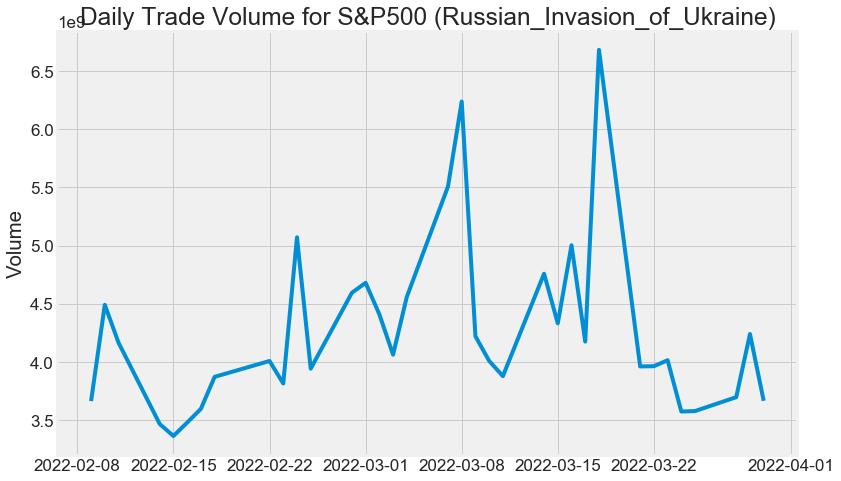

In [15]:
SP500_df_volume = pd.DataFrame(DataReader('^GSPC', 'yahoo', this_year_start, this_year_end)['Volume'])
plt.figure(figsize=(12, 7))
plt.rc('font', size=17)  
plt.plot(SP500_df.index,SP500_df_volume['Volume'])
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Daily Trade Volume for S&P500 ({Period})")
plt.tight_layout()
plt.savefig(f"Daily Trade Volume for S&P500 ({Period}).png")   

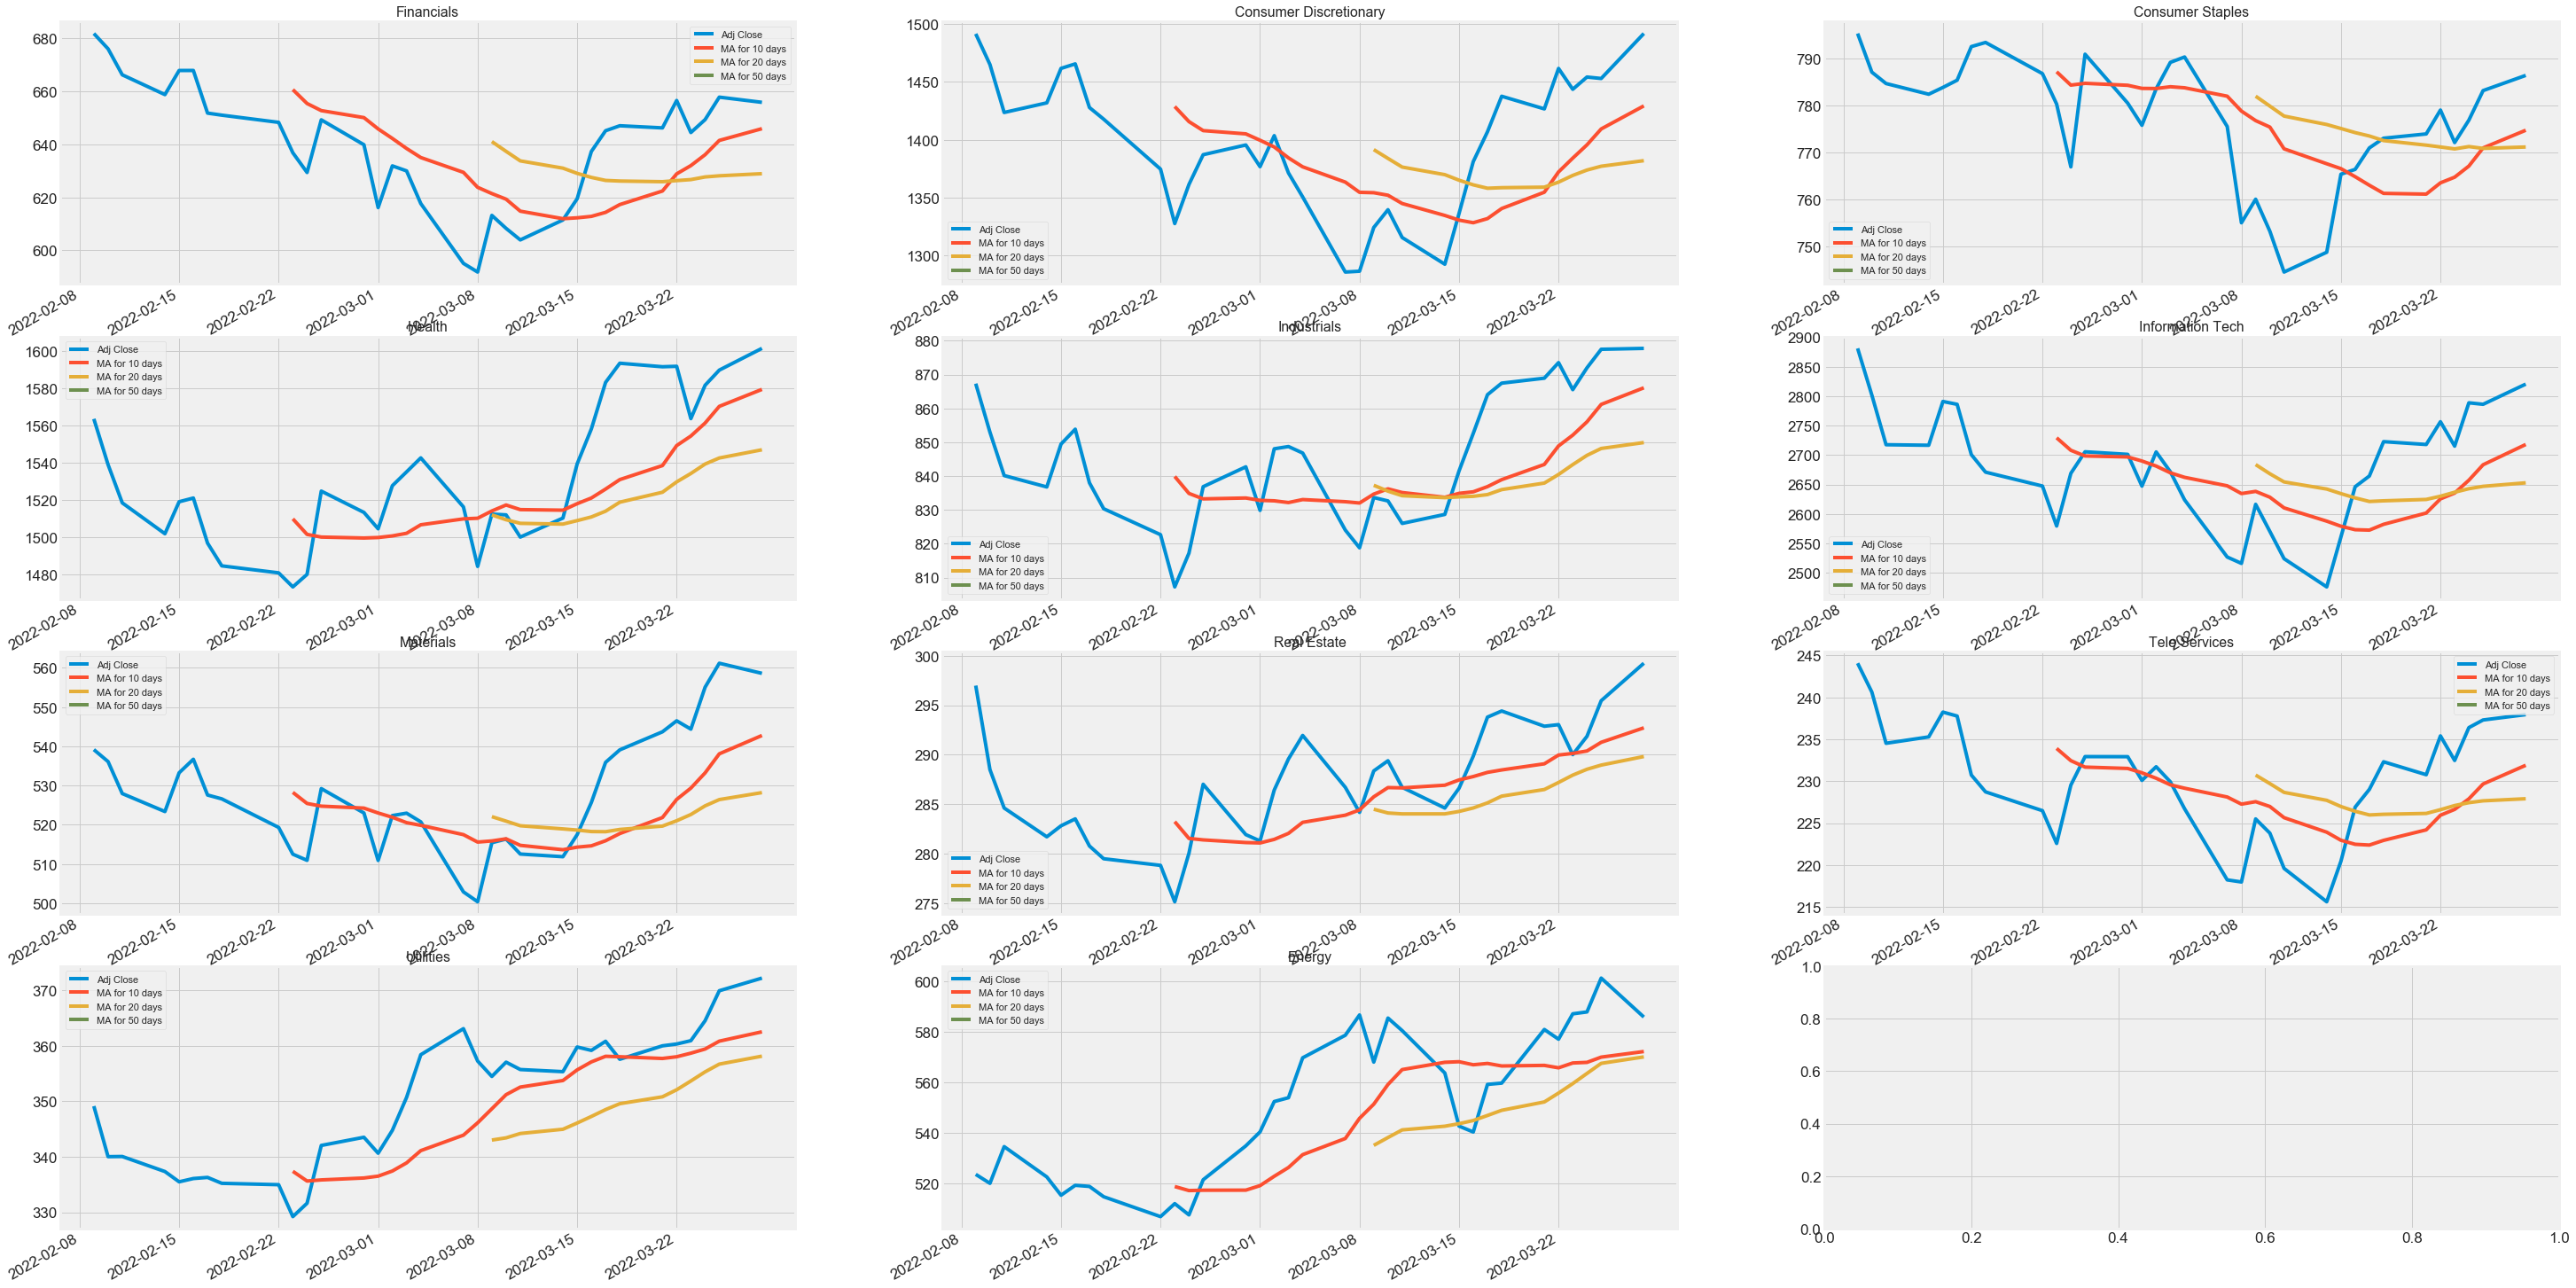

In [16]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for i, sector in enumerate(sector_list, 1):
        column_name = f"MA for {ma} days"
        thisyear[i-1][column_name] = thisyear[i-1]['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=4, ncols=3)
plt.rc('font', size=11) 

fig.set_figheight(27.81)
fig.set_figwidth(45)
thisyear[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_xlabel(None)
axes[0,0].set_title(f'{sector_name[0]}')
thisyear[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_xlabel(None)
axes[0,1].set_title(f'{sector_name[1]}')
thisyear[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_xlabel(None)
axes[0,2].set_title(f'{sector_name[2]}')
thisyear[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_xlabel(None)
axes[1,0].set_title(f'{sector_name[3]}')
thisyear[4][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_xlabel(None)
axes[1,1].set_title(f'{sector_name[4]}')
thisyear[5][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_xlabel(None)
axes[1,2].set_title(f'{sector_name[5]}')
thisyear[6][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_xlabel(None)
axes[2,0].set_title(f'{sector_name[6]}')
thisyear[7][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_xlabel(None)
axes[2,1].set_title(f'{sector_name[7]}')
thisyear[8][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,2])
axes[2,2].set_xlabel(None)
axes[2,2].set_title(f'{sector_name[8]}')
thisyear[9][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_xlabel(None)
axes[3,0].set_title(f'{sector_name[9]}')
thisyear[10][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,1])
axes[3,1].set_xlabel(None)
axes[3,1].set_title(f'{sector_name[10]}')
plt.savefig(f"MA by Sectors ({Period}).png")        


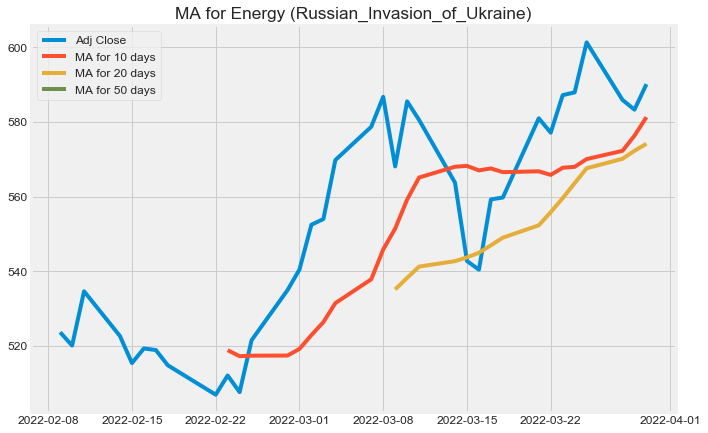

In [17]:
energy_df = pd.DataFrame(DataReader("^GSPE", 'yahoo', this_year_start, this_year_end)['Adj Close'])
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    energy_df[column_name] = energy_df['Adj Close'].rolling(ma).mean()
    
plt.figure(figsize=(10,6.18))
plt.rc('font', size=12) 
plt.plot(energy_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].index,energy_df[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']])
thisyear[8].plot(ax=axes[2,2])

plt.legend(energy_df)
plt.xlabel(None)
plt.title(f"MA for Energy ({Period})")
plt.tight_layout()
plt.savefig(f"MA for Energy ({Period}).png")    

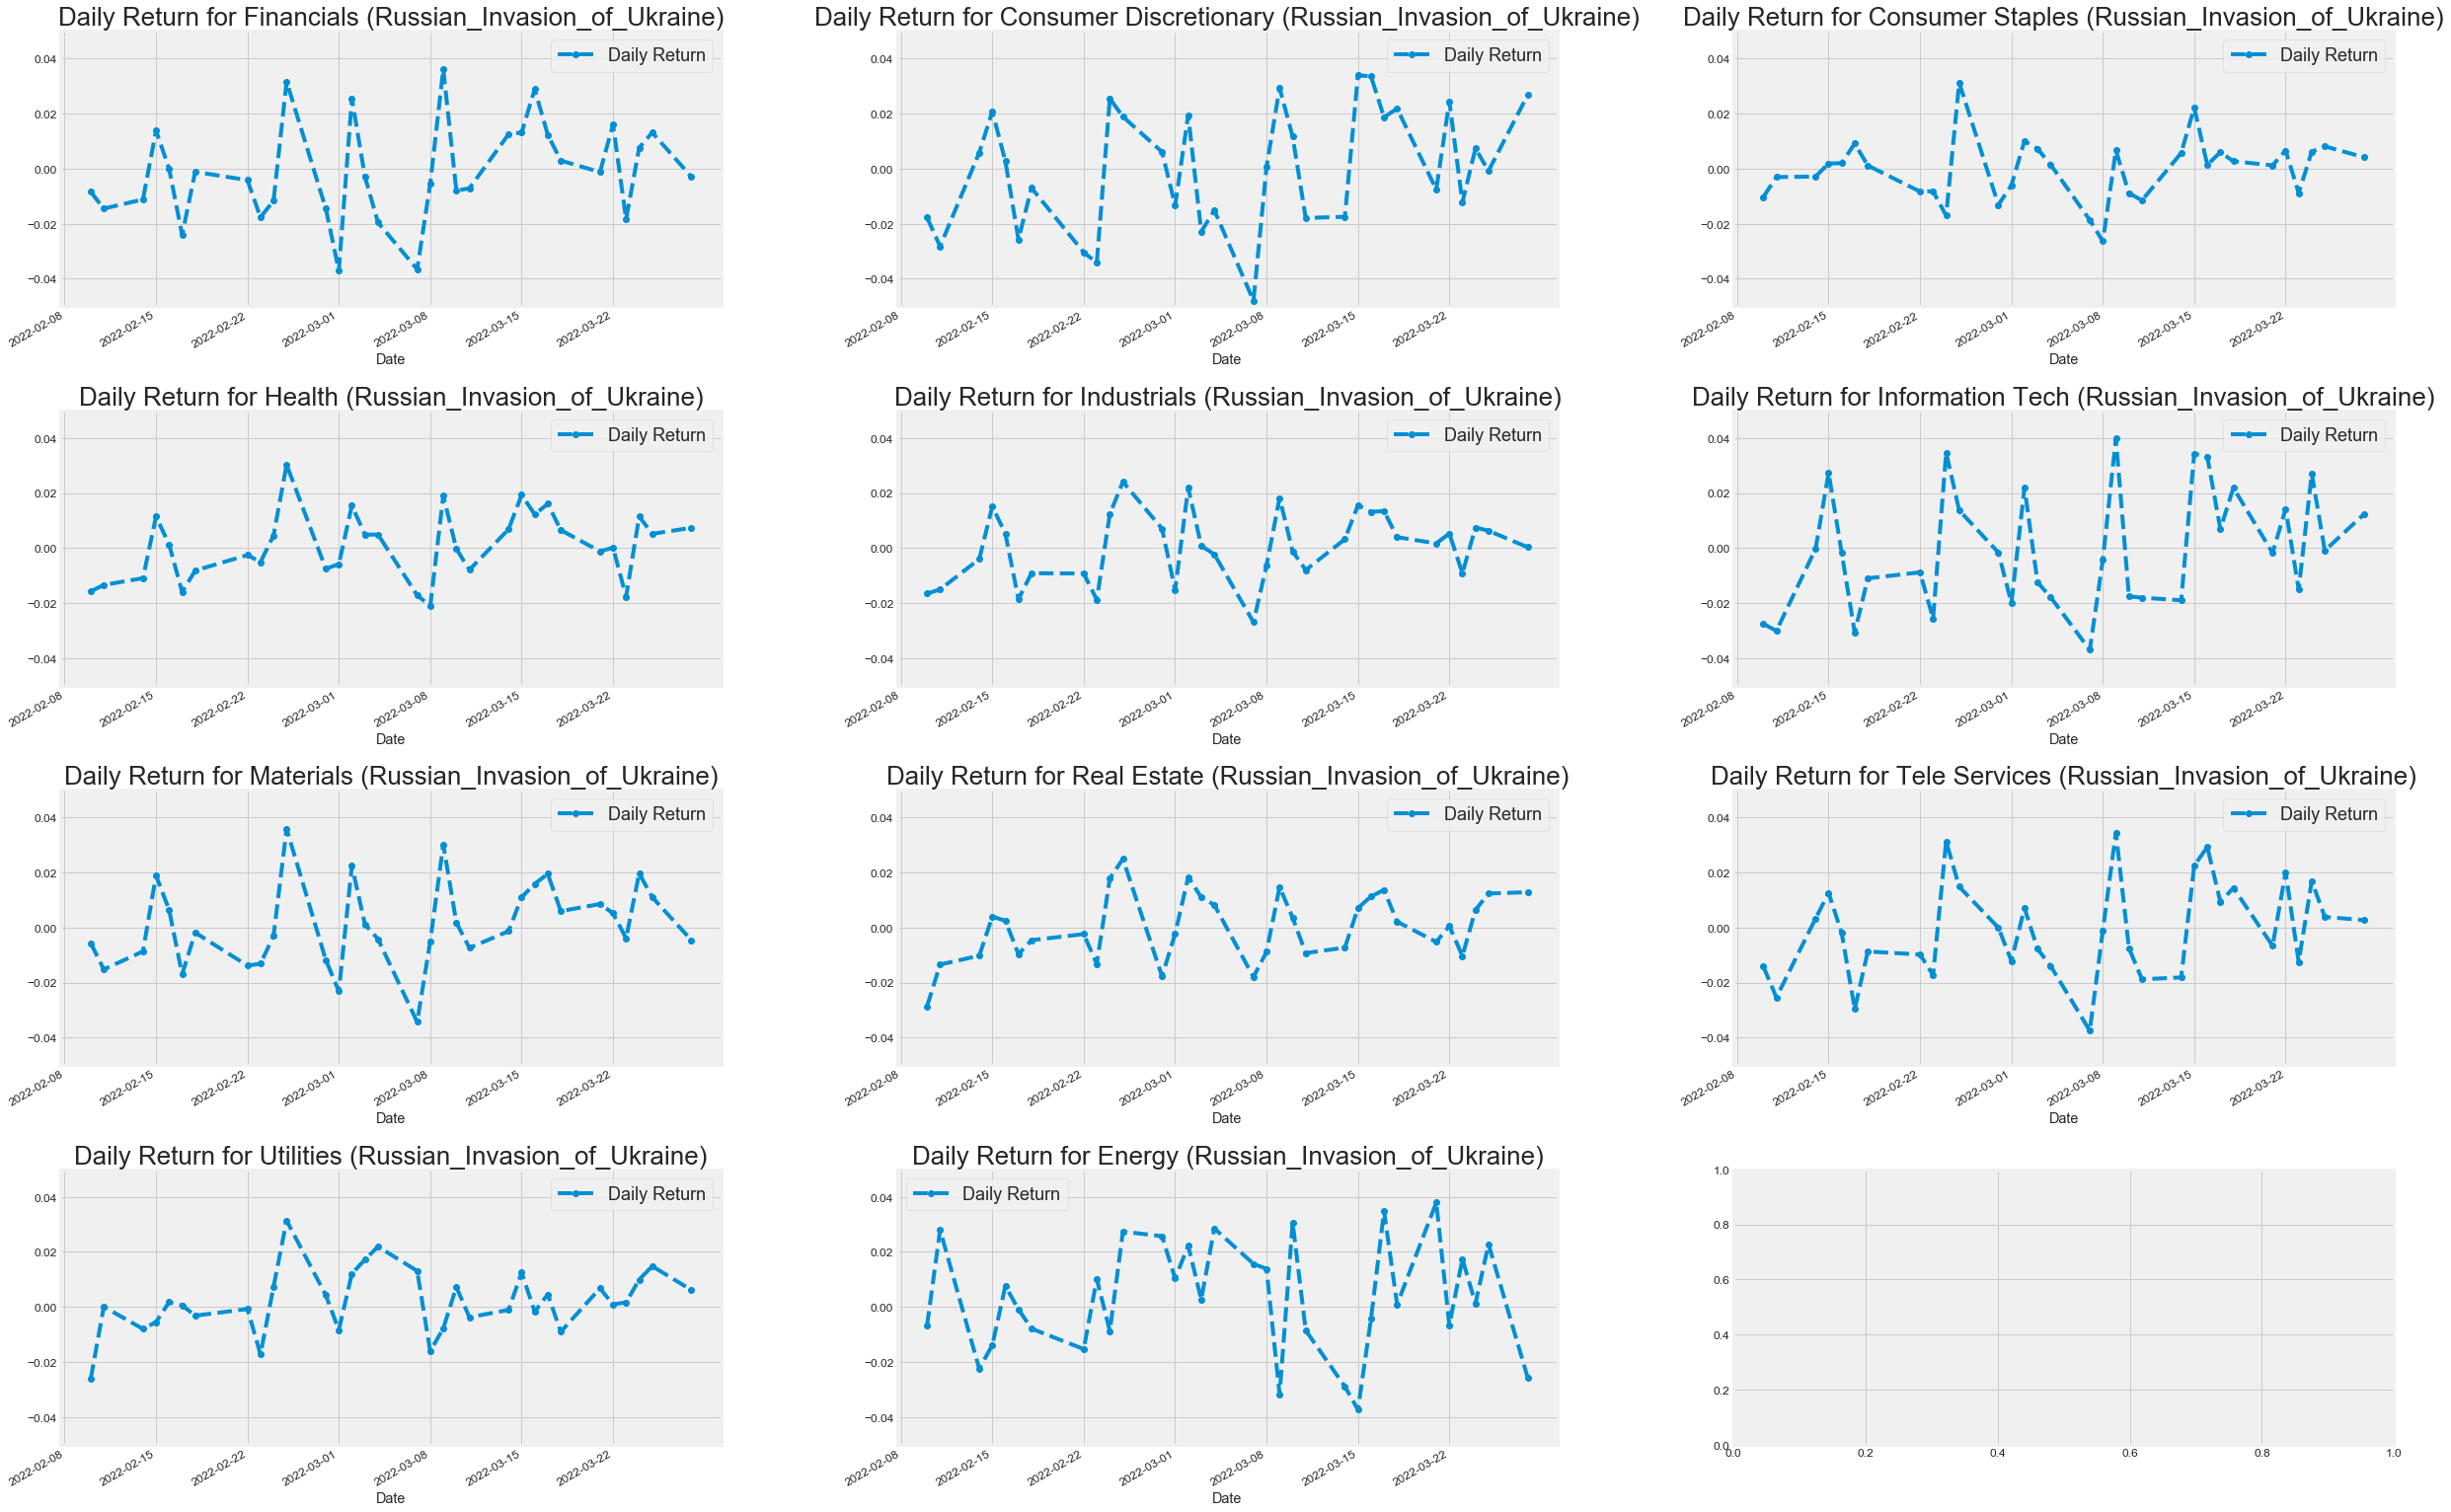

In [23]:
for i, sector in enumerate(sector_list, 1):
    thisyear[i-1]['Daily Return'] = thisyear[i-1]['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=4, ncols=3)
plt.rc('font', size=18) 

# plt.figure(figsize=(20, 12.36))
fig.set_figheight(21.63)
fig.set_figwidth(35)
# plt.figure(figsize=(35, 21.63))

plt.xlabel(None)

thisyear[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(f'Daily Return for {sector_name[0]} ({Period})')
# plt.rc('font', size=18) 
axes[0,0].set_ylim([-0.05,0.05])
thisyear[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(f'Daily Return for {sector_name[1]} ({Period})')
axes[0,1].set_ylim([-0.05,0.05])
thisyear[2]['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title(f'Daily Return for {sector_name[2]} ({Period})')
axes[0,2].set_ylim([-0.05,0.05])
thisyear[3]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(f'Daily Return for {sector_name[3]} ({Period})')
axes[1,0].set_ylim([-0.05,0.05])
thisyear[4]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(f'Daily Return for {sector_name[4]} ({Period})')
axes[1,1].set_ylim([-0.05,0.05])
thisyear[5]['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title(f'Daily Return for {sector_name[5]} ({Period})')
axes[1,2].set_ylim([-0.05,0.05])
thisyear[6]['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title(f'Daily Return for {sector_name[6]} ({Period})')
axes[2,0].set_ylim([-0.05,0.05])
thisyear[7]['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title(f'Daily Return for {sector_name[7]} ({Period})')
axes[2,1].set_ylim([-0.05,0.05])
thisyear[8]['Daily Return'].plot(ax=axes[2,2], legend=True, linestyle='--', marker='o')
axes[2,2].set_title(f'Daily Return for {sector_name[8]} ({Period})')
axes[2,2].set_ylim([-0.05,0.05])
thisyear[9]['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='--', marker='o')
axes[3,0].set_title(f'Daily Return for {sector_name[9]} ({Period})')
axes[3,0].set_ylim([-0.05,0.05])
thisyear[10]['Daily Return'].plot(ax=axes[3,1], legend=True, linestyle='--', marker='o')
axes[3,1].set_title(f'Daily Return for {sector_name[10]} ({Period})')
axes[3,1].set_ylim([-0.05,0.05])
fig.tight_layout()
plt.savefig(f"Daily Return by Sectors ({Period}).png")        


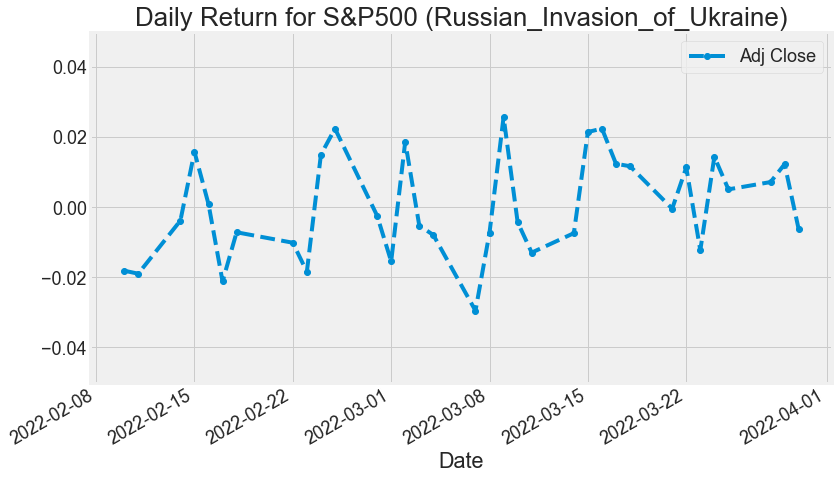

In [24]:
plt.figure(figsize=(12, 7))
SP500_df['Adj Close'].pct_change().plot( legend=True, linestyle='--', marker='o')
plt.ylabel(None)
plt.title(f"Daily Return for S&P500 ({Period})")
plt.ylim([-0.05,0.05])
plt.tight_layout()
plt.savefig(f"Daily Return for S&P500 ({Period}).png")    

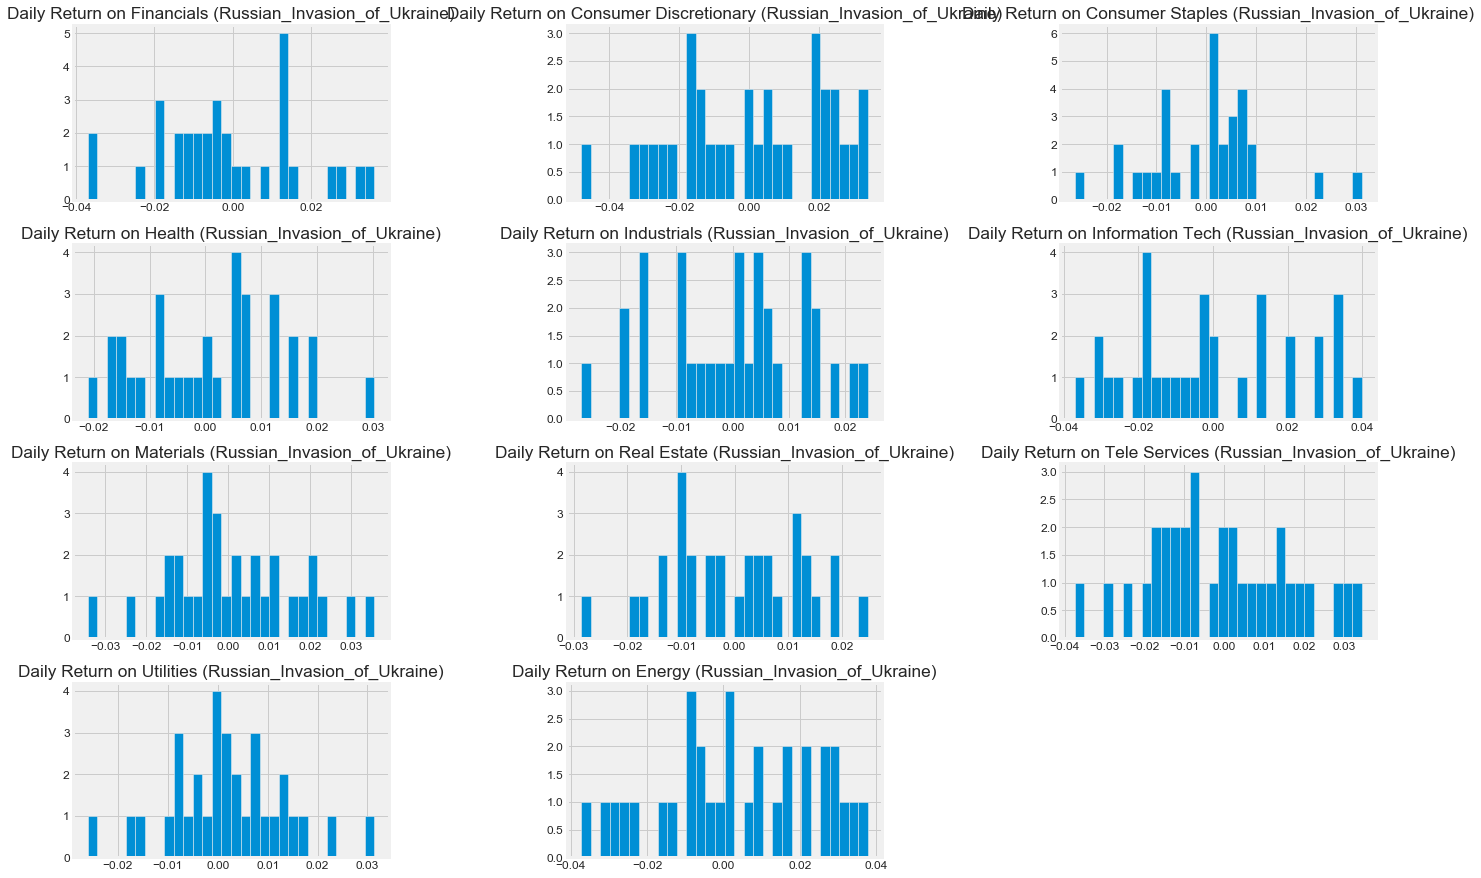

In [25]:
plt.figure(figsize=(20, 12.36))
plt.rc('font', size=12) 
for i, sector in enumerate(sector_list, 1):
    plt.subplot(4, 3, i)
    thisyear[i-1]['Daily Return'].hist(bins=30)
    plt.ylabel(None)
    plt.xlabel(f'')
    plt.title(f'Daily Return on {sector_name[i - 1]} ({Period})')   
plt.tight_layout()
plt.savefig(f"Daily Return by Sectors ({Period}) - histogram.png")    

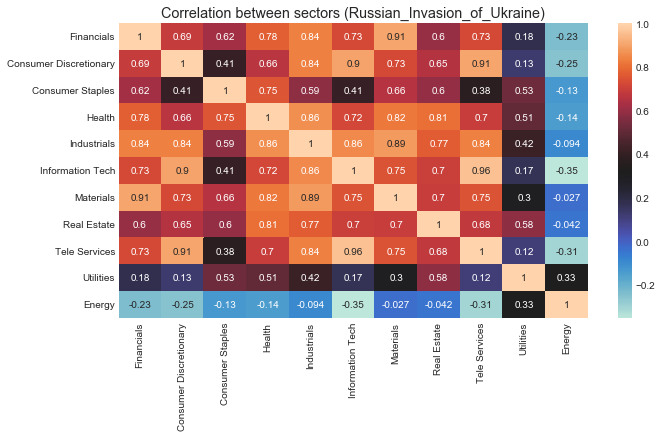

In [26]:
closing_this_year_df = DataReader(sector_list, 'yahoo', this_year_start, this_year_end)['Adj Close']
sector_rate = closing_this_year_df.pct_change()
sector_rate.rename(columns={'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)
plt.figure(figsize=(10,6.18))
plt.rc('font', size=10) 
sns.heatmap(sector_rate.corr(), annot=True, cmap='icefire')
plt.xlabel(None)
plt.ylabel(None)
plt.title(f'Correlation between sectors ({Period})')   
plt.tight_layout()
plt.savefig(f"Correlation by Sectors ({Period}).png")


<Figure size 2880x1779.84 with 0 Axes>

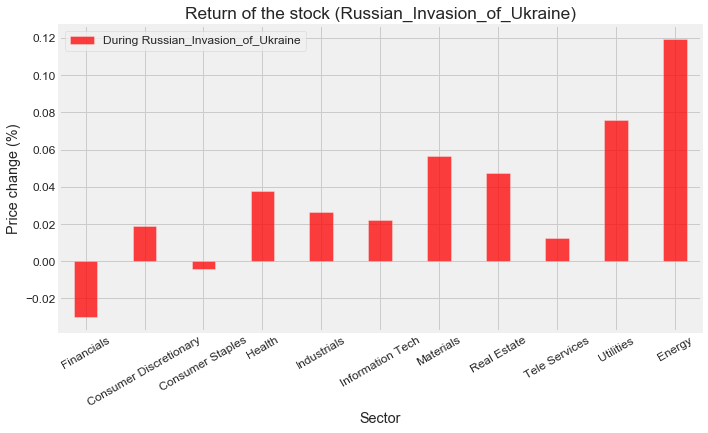

In [27]:
closing_end = DataReader(sector_list, 'yahoo', this_year_end, this_year_end)['Adj Close']
opening_start = DataReader(sector_list, 'yahoo', this_year_start, this_year_start)['Open']

period_return_list=[]
for q in sector_list:
    period_return_list.append((closing_end.loc[closing_end.index.min(),q]-opening_start.loc[opening_start.index.min(),q])/opening_start.loc[opening_start.index.min(),q])
period_return_list

period_return = {f'During {Period}': period_return_list}
period_return_df = pd.DataFrame(period_return)
period_return_df.index = sector_name
period_return_df['positive'] = period_return_df[f'During {Period}']>0


plt.figure(figsize=(40,24.72))
plt.rc('font', size=12)
period_return_df.plot(kind="bar",color= period_return_df.positive.map({True: 'g', False: 'r'}), alpha=0.75, align="center",width=0.4,figsize=(10, 6.18))
plt.xticks(rotation=30)
# Set appearance
plt.title(f"Return of the stock ({Period})")
plt.xlabel("Sector")
plt.ylabel("Price change (%)")
plt.tight_layout()
plt.savefig(f"Return of the stock ({Period}).png")        

Symbols,Financials,Consumer Discretionary,Consumer Staples,Health,Industrials,Information Tech,Materials,Real Estate,Tele Services,Utilities,Energy
Date,,,,,,,,,,,
2020-02-20,-0.001300,-0.000114,0.001012,-0.006212,-0.001652,-0.010096,0.001342,0.011533,-0.006063,0.003153,-0.001651
2020-02-21,-0.009714,-0.016352,0.002776,0.000316,-0.004426,-0.022507,-0.003995,0.003788,-0.013973,-0.001824,-0.012600
2020-02-24,-0.032745,-0.035285,-0.024843,-0.032632,-0.029782,-0.041852,-0.028582,-0.013399,-0.033153,-0.011612,-0.047373
2020-02-25,-0.034056,-0.026050,-0.017483,-0.029507,-0.040284,-0.031814,-0.043007,-0.025719,-0.024063,-0.021648,-0.043393
2020-02-26,-0.006741,-0.006937,-0.004869,-0.001027,-0.007947,0.003988,-0.003407,-0.008773,-0.002073,-0.009653,-0.029682


The pearson correlation coefficient is: 0.8657765993121339
The p-value is: 4.309750850162732e-39


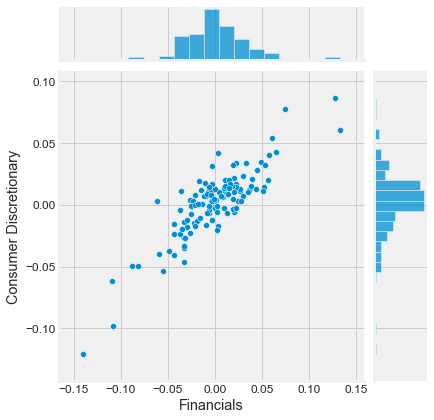

In [78]:
import scipy
from scipy import stats

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(sector_list, 'yahoo', this_year_start, this_year_end)['Adj Close']
sector_rets = closing_df.pct_change().dropna()
sector_rets.rename(columns={'^GSPC':"S&P500",'^SP500-40':"Financials",'^SP500-25':"Consumer Discretionary",
                            '^SP500-30':"Consumer Staples","^SP500-35":"Health","^SP500-20":"Industrials",
                            "^SP500-45":"Information Tech","^SP500-15":"Materials","^SP500-60":"Real Estate",
                            "^SP500-50":"Tele Services","^SP500-55":"Utilities","^GSPE":"Energy"}, inplace=True)

p = sns.jointplot( data=sector_rets, x = "Financials", y='Consumer Discretionary',kind='scatter')
r, p = scipy.stats.pearsonr(sector_rets["Financials"], sector_rets['Consumer Discretionary'])
print("The pearson correlation coefficient is:", r)
print("The p-value is:", p)

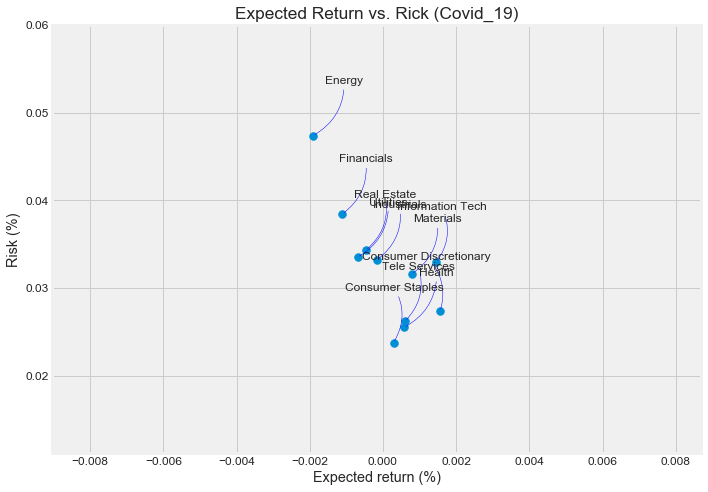

In [77]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = sector_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
# plt.xlim(-0.0013,-0.0002)
# plt.ylim(0.02,0.06)
plt.xlabel('Expected return (%)')
plt.ylabel('Risk (%)')
# plt.xlabel(None)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.title(f"Expected Return vs. Rick ({Period})")
plt.tight_layout()
plt.savefig(f"Expected Return vs. Rick ({Period}).png")  

In [43]:
rets['Consumer Staples'].quantile(0.05)

-0.0645171459919573

In [44]:
rets['Energy'].quantile(0.05)

-0.1356020282438893

In [45]:
rets['Financials'].quantile(0.05)

-0.10675057684601252